<a href="https://colab.research.google.com/github/ElenaHrytsai/BA_reviews_analytics/blob/main/BA_reviews_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import OrderedDict

In [3]:
DF = pd.read_csv('../content/drive/MyDrive/data/BA_reviews_columns.csv')

In [13]:
DF.head()

,reviews,rating,Aircraft,Type of Traveller,Seat Type,Route,Date Flown,Recommended
0,✅ Trip Verified | British airways lost bags ...,1,NaN,Family Leisure,Premium Economy,Houston to cologne via London,2024-12,no
1,✅ Trip Verified | The check in process and rew...,1,A320,Business,Economy Class,London to Basel,2025-01,no
2,"✅ Trip Verified | We flew in November 2023, ...",1,NaN,Family Leisure,Economy Class,London to Phoenix,2023-11,no
3,✅ Trip Verified | I left for London from Johan...,1,NaN,Family Leisure,Economy Class,London to Johannesburg,2025-01,no
4,✅ Trip Verified | After an excellent flight ...,5,A380,Solo Leisure,Business Class,London to Cape Town via Johannesburg,2024-12,yes


In [14]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   reviews            1000 non-null   object
 1   rating             1000 non-null   int64 
 2   Aircraft           522 non-null    object
 3   Type of Traveller  998 non-null    object
 4   Seat Type          1000 non-null   object
 5   Route              995 non-null    object
 6   Date Flown         1000 non-null   object
 7   Recommended        1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [15]:
DF['reviews'].astype('string')

,reviews
0,✅ Trip Verified | British airways lost bags ...
1,✅ Trip Verified | The check in process and rew...
2,"✅ Trip Verified | We flew in November 2023, ..."
3,✅ Trip Verified | I left for London from Johan...
4,✅ Trip Verified | After an excellent flight ...
...,...
995,✅ Trip Verified | Hong Kong to Copenhagen via...
996,✅ Trip Verified | London Gatwick to San Jose C...
997,Not Verified | Inflight crew were very helpfu...
998,✅ Trip Verified | From Toronto to Pisa British...


Let's have a look to the overall rating and the average rating by seat type.

In [41]:
DF['rating'].mean()

3.924

In [46]:
DF.groupby('Seat Type')['rating'].mean().sort_values(ascending = False)

,rating
Seat Type,
First Class,5.842105
Business Class,4.831884
Premium Economy,3.892857
Economy Class,3.295290


It is visible, that the largest rating is for First class and it decreases with the decrease in a seat class.

Now let's find out how much customers recommend to use the airline's services. We will group them by seat type.

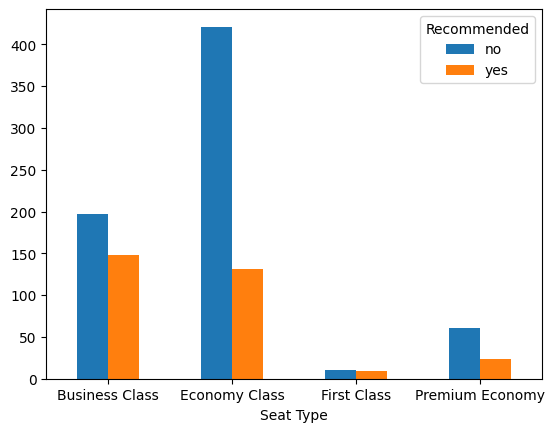

In [51]:
DF.groupby("Seat Type")["Recommended"].value_counts().unstack().plot(kind='bar')
plt.xticks(rotation= 'horizontal')
plt.show()

From the bar plot we can conclude that the most unsatisfied with service clients is for Economy class. It has also the largest gap between customers who recommends the airlines and who don't. Possibly, these data require more detailed analysys to figure out the root case.

Next, it might be useful to check the trend for average rating by date.

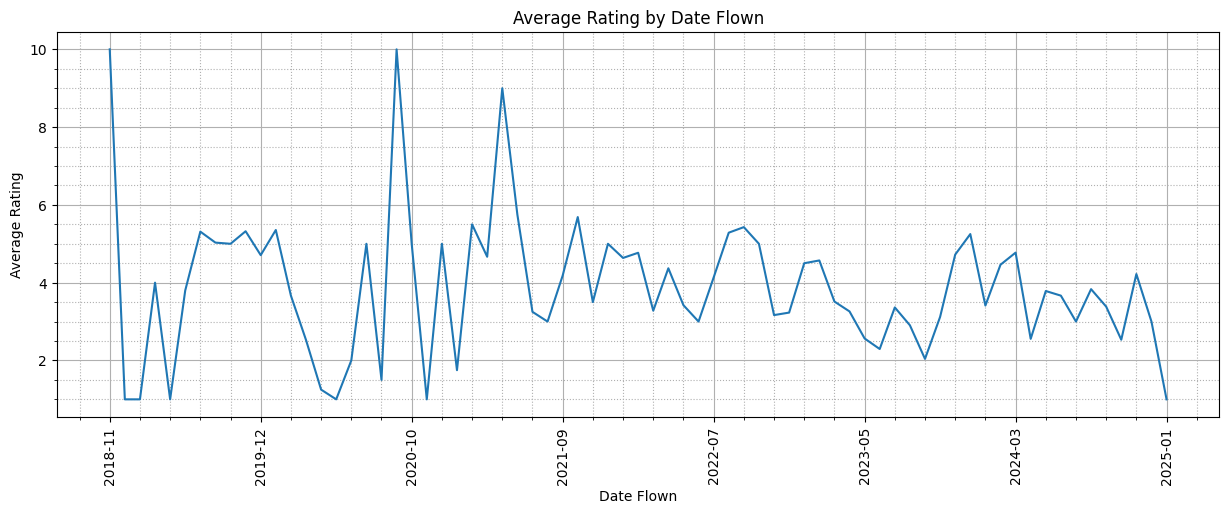

In [99]:
DF.groupby("Date Flown")["rating"].mean().plot(kind = 'line', figsize = (15, 5), grid = True)
plt.grid(axis='both', which='minor', linestyle=':')
plt.minorticks_on()
plt.xlabel("Date Flown")
plt.xticks(rotation = 'vertical')
plt.ylabel("Average Rating")
plt.title("Average Rating by Date Flown")
plt.show()

Looks like we have a negative trend for the overall rating during the last year

Next, will create a **Word cloud** from reviews.

First, we will create the word cloud from the one review. Next, will adjust it and generate from all scraped reviews.

In [16]:
text = DF['reviews'][0]

In [17]:
wordcloud = WordCloud().generate(text)

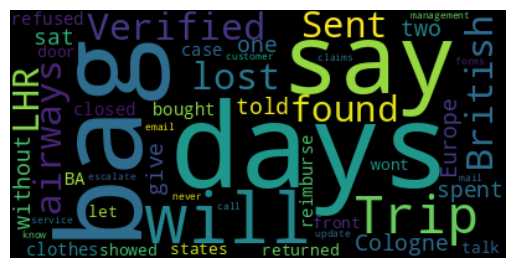

In [18]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

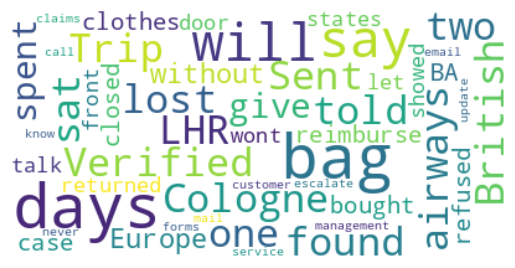

In [19]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
text = " ".join(i for i in DF.reviews)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 875802 words in the combination of all review.


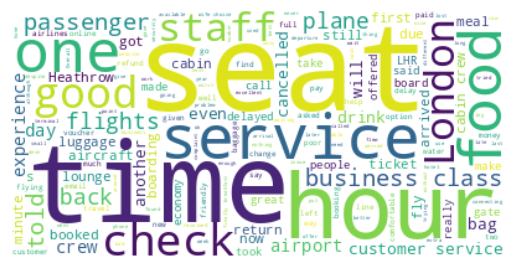

In [21]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Verified", "Trip", "BA", "British", "airways", "airline", "u", "flight", "us"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
wordcloud.to_file("/content/drive/MyDrive/data/Wordcloud.png")

Next, let's take a look to the most common words. We need to sort all the words from wordcloud according to the frequency of their use.



In [23]:
all_words = wordcloud.words_

In [24]:
all_words_sorted = dict(sorted(all_words.items(), key=lambda item: item[1], reverse= True))

In [25]:
keys = list(all_words_sorted.keys())[:20]

In [26]:
keys

['seat',
 'time',
 'hour',
 'service',
 'one',
 'food',
 'check',
 'good',
 'London',
 'staff',
 'business class',
 'told',
 'passenger',
 'flights',
 'back',
 'plane',
 'airport',
 'experience',
 'crew',
 'day']

In [28]:
df2 = pd.DataFrame({'Word': keys})
for i in range(len(keys)):
  df2.loc[i, "Freq"] = all_words_sorted[keys[i]]

In [29]:
df2

,Word,Freq
0,seat,1.000000
1,time,0.825145
2,hour,0.709538
3,service,0.697977
4,one,0.635838
5,food,0.632948
6,check,0.544798
7,good,0.543353
8,London,0.478324
9,staff,0.456647


Let's now visualize the most common 20 words from all reviews.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'time'),
  Text(2, 0, 'hour'),
  Text(3, 0, 'service'),
  Text(4, 0, 'one'),
  Text(5, 0, 'food'),
  Text(6, 0, 'check'),
  Text(7, 0, 'good'),
  Text(8, 0, 'London'),
  Text(9, 0, 'staff'),
  Text(10, 0, 'business class'),
  Text(11, 0, 'told'),
  Text(12, 0, 'passenger'),
  Text(13, 0, 'flights'),
  Text(14, 0, 'back'),
  Text(15, 0, 'plane'),
  Text(16, 0, 'airport'),
  Text(17, 0, 'experience'),
  Text(18, 0, 'crew'),
  Text(19, 0, 'day')])

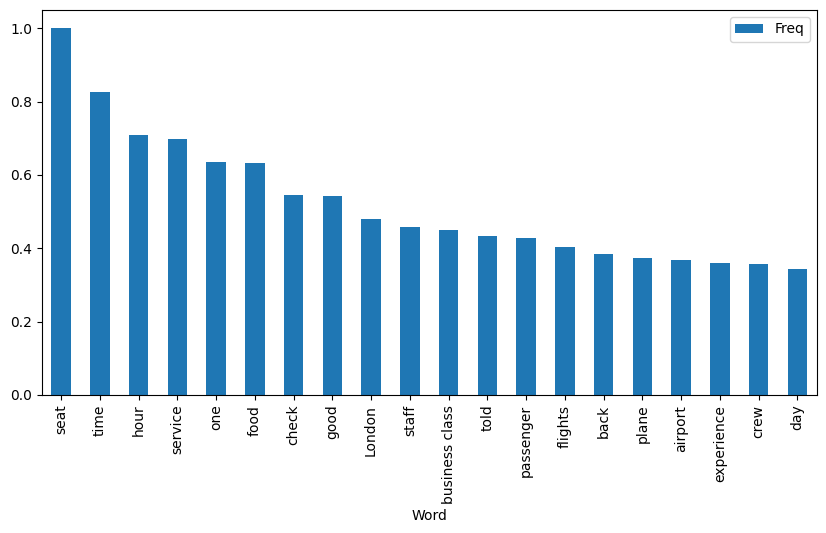

In [30]:
df2.plot.bar(x ='Word', y ='Freq', figsize=(10,5))
plt.xticks(rotation= 'vertical')


After general analysis of the Word cloud, it can be assumed that the key  customer's concerns are related to the areas of service, food, staff, and crew. These areas require further research to improve service quality and the airline's rating.